In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np
import pandas as pd

def perform_linear_regression(X, y, cityname):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Open a file to write the results
    with open('regression_results_'+ cityname +'.txt', 'w') as file:
        file.write(f"Model Coefficients: {model.coef_}\n")
        file.write(f"Model Intercept: {model.intercept_}\n")
        
        mse = mean_squared_error(y, y_pred)
        rmse = sqrt(mse)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        file.write(f"Mean Squared Error: {mse:.2f}\n")
        file.write(f"R-squared Score: {r2:.4f}\n")
        file.write(f"Mean Absolute Error: {mae:.2f}\n")
        file.write(f"Root Mean Squared Error: {rmse:.4f}\n")

    return model



In [6]:
def removeMissingRows(df, column_name):
    df = df.dropna(subset=column_name)
    return df

In [9]:
from joblib import dump


cities = ['Bakersfield','Los_Angeles','New_York','Phoenix','Reno','Visalia','Denver', 'Boston']
for city in cities:
    df = pd.read_csv('../csv/final_merged_data/merged_data_'+city+'.csv')
    numerical_features = ['temp','visibility','dew_point','feels_like','pressure','humidity','wind_speed','wind_deg','wind_gust','rain_1h','snow_1h','clouds_all','weather_id', 'year','month','day']
    df = removeMissingRows(df, numerical_features)
    df = removeMissingRows(df, ['aqi'])
    X = df[numerical_features]
    y = df['aqi']
    lr_model = perform_linear_regression(X, y, city)
    dump(lr_model, 'linear_regression_model_'+city+'.joblib')
    print('results saved to linear_regression_model_'+city+'.joblib')

/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5149/3719672129.py:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_'+city+'.csv')


results saved to linear_regression_model_Bakersfield.joblib


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5149/3719672129.py:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_'+city+'.csv')


results saved to linear_regression_model_Los_Angeles.joblib


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5149/3719672129.py:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_'+city+'.csv')


results saved to linear_regression_model_New_York.joblib


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5149/3719672129.py:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_'+city+'.csv')


results saved to linear_regression_model_Phoenix.joblib


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5149/3719672129.py:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_'+city+'.csv')


results saved to linear_regression_model_Reno.joblib
results saved to linear_regression_model_Visalia.joblib


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5149/3719672129.py:6: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_'+city+'.csv')


results saved to linear_regression_model_Denver.joblib


/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_5149/3719672129.py:6: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../csv/final_merged_data/merged_data_'+city+'.csv')


results saved to linear_regression_model_Boston.joblib


In [6]:
perform_linear_regression(X, y)
print("Results saved to linear_regression_results.txt")

Results saved to linear_regression_results.txt


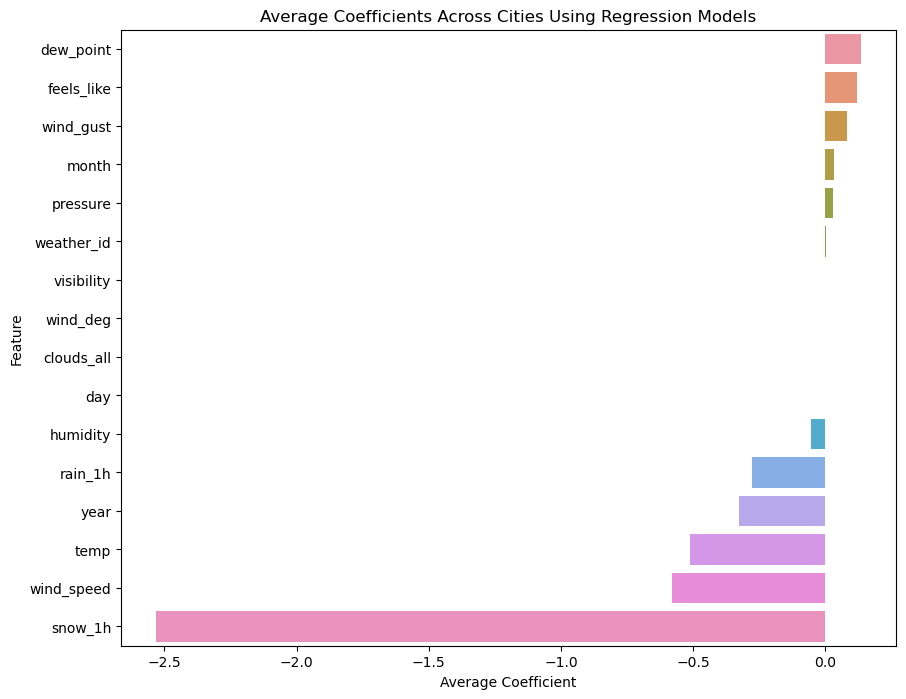

In [1]:
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cities = ['Bakersfield', 'Los_Angeles', 'New_York', 'Phoenix', 'Reno', 'Visalia', 'Denver', 'Boston']
features = ['temp', 'visibility', 'dew_point', 'feels_like', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_id', 'year', 'month', 'day']

# Initialize a DataFrame to store feature coefficients across all cities
coef_data = pd.DataFrame(columns=features)

for city in cities:
    # Load the pre-trained regression model
    model = load(f'../results/linear_regression/linear_regression_model_{city}.joblib')

    # Get coefficients from the model
    coefficients = model.coef_  # Assuming the model has a .coef_ attribute

    # Add current city's coefficients to the DataFrame
    coef_data.loc[city] = coefficients

# Calculate the average coefficient for each feature across all cities
average_coefficients = coef_data.mean(axis=0)

# Create a DataFrame from the average coefficients
average_coefficients_df = pd.DataFrame({'Feature': features, 'Average Coefficient': average_coefficients})

# Sort features by average coefficient
average_coefficients_df = average_coefficients_df.sort_values(by='Average Coefficient', ascending=False)

# Create a bar plot of average feature coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Average Coefficient', y='Feature', data=average_coefficients_df)
plt.title('Average Coefficients Across Cities Using Regression Models')
plt.xlabel('Average Coefficient')
plt.ylabel('Feature')
plt.show()
